<a href="https://colab.research.google.com/github/Datamin-D/Career/blob/master/%5B3_2%5DTOP2VEC_Topic_modeling_pos%26neg%20%EC%A0%84%EB%B6%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
from datetime import datetime
import numpy as np
import scipy as sp
import sklearn
import sys
import os

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
from scipy import linalg

# !pip install gensim 완료
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import pickle
import string
import time


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
path = r'/gdrive/MyDrive/석사 수업/2학기/비즈니스 텍스트마이닝'
os.chdir(path)
with open("preprocessed_df","rb") as fr:
    df = pickle.load(fr)

In [ ]:
# !pip install top2vec

from top2vec import Top2Vec

In [ ]:
# word to a str
joined = df['content_p'].apply(lambda x: " ".join(x)) # input은  [docu1,docu2] 의 형태. 
joined_list = list(joined)
joined_list[0]
#wc_input = joined.sum()

'혈당 재기 직전 운동 마치다 저녁 식사 후 말다 앉다 재니 나오다 이렇다 수도 두 번 손 자다 씻다 운동 않다 떨어지다 수'

In [ ]:
model = Top2Vec(documents=joined_list, speed="learn", workers=8,min_counts = 50) #min_counts = 바꿔볼 수도.

2021-05-29 13:50:03,231 - top2vec - INFO - Pre-processing documents for training
2021-05-29 13:50:06,942 - top2vec - INFO - Creating joint document/word embedding
2021-05-29 13:54:42,209 - top2vec - INFO - Creating lower dimension embedding of documents
2021-05-29 13:55:31,588 - top2vec - INFO - Finding dense areas of documents
2021-05-29 13:55:34,383 - top2vec - INFO - Finding topics


In [ ]:
# !pip install tensorflow tensorflow_hub tensorflow_text

In [ ]:
model.get_num_topics()

In [ ]:
model.get_topic_sizes()

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(10)


In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=1, num_docs=10)


In [ ]:
documents

In [ ]:
topic_nums

In [ ]:

topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["혈당"], num_topics=5)


In [ ]:
topic_words

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["운동"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic,font = 'NanumGothic.ttf')

# TOP2VEC 이 안된다면.. LDA

In [ ]:
밑에서 news_df['title_n'] 어케 들어가나 보셈. 리스트 형태임.

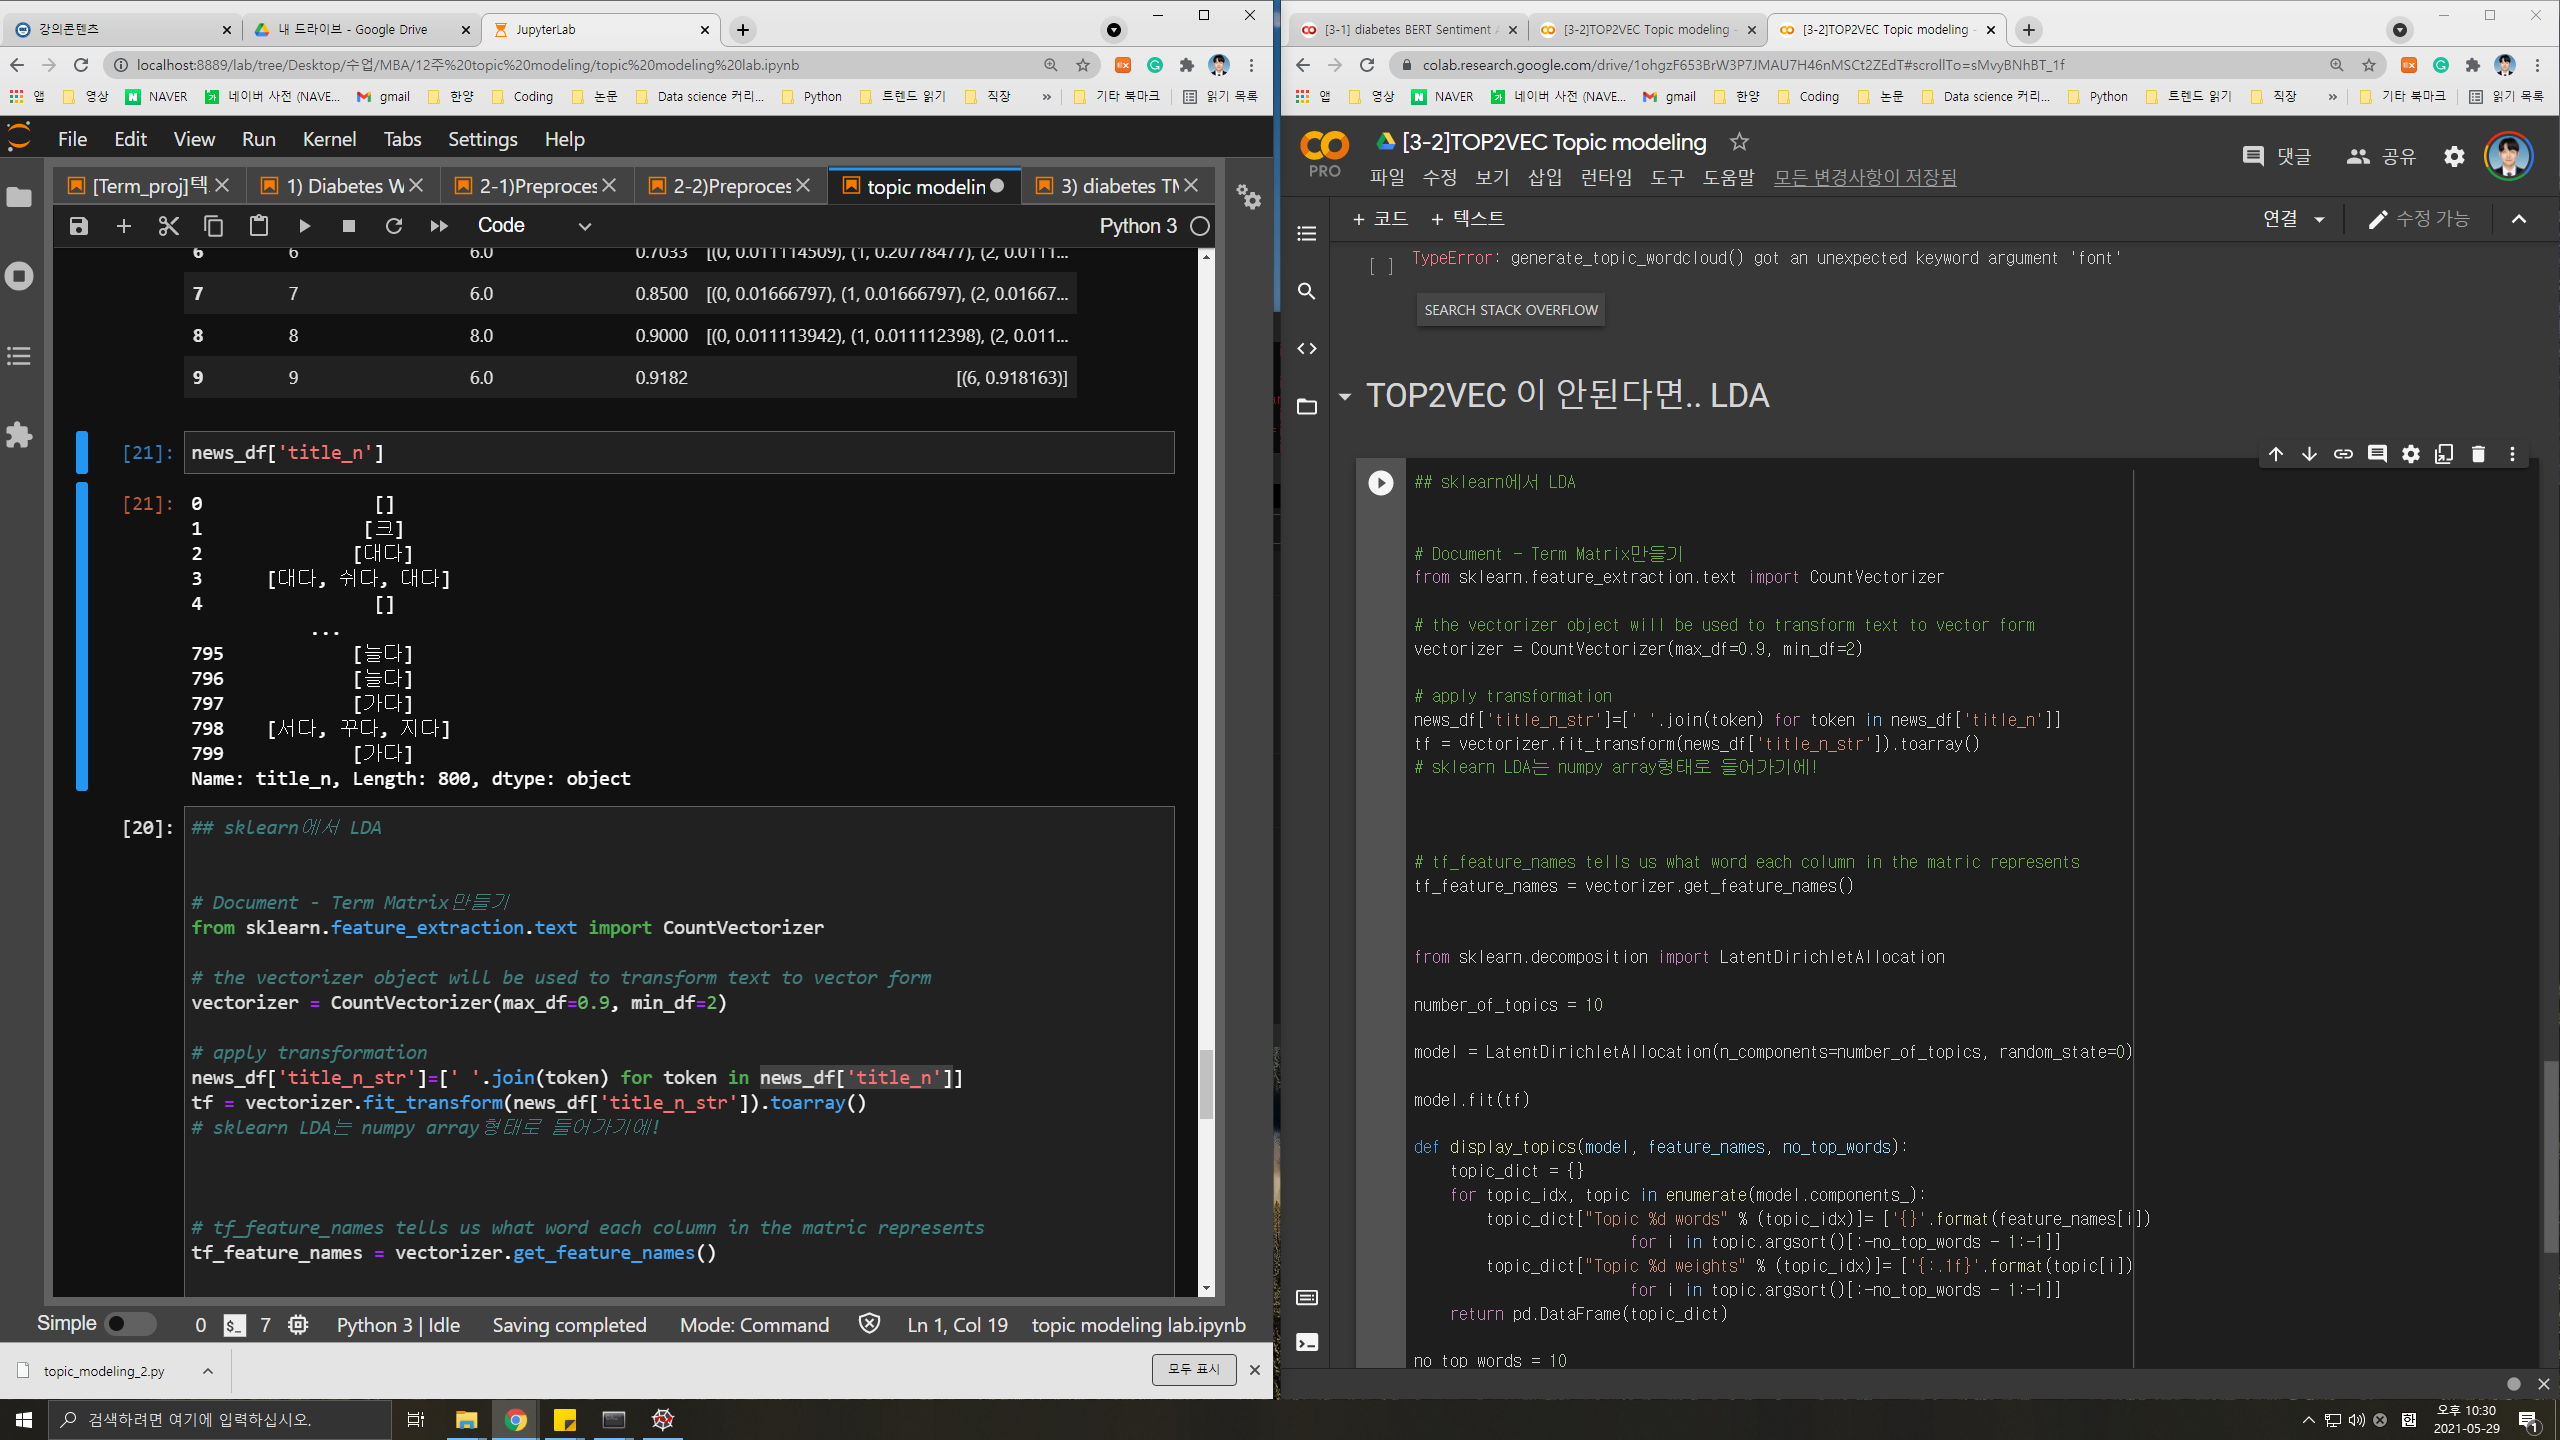

In [ ]:
## sklearn에서 LDA
 
    
# Document - Term Matrix만들기
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=2)

# apply transformation
df['title_n_str']=[' '.join(token) for token in df['content_p']]
tf = vectorizer.fit_transform(df['title_n_str']).toarray()
# sklearn LDA는 numpy array형태로 들어가기에!



# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()


from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

model.fit(tf)

def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

no_top_words = 10
topic_dictionary=display_topics(model, tf_feature_names, no_top_words)



## ABSA 용 lexicon 생성

In [ ]:
topic_dictionary
for top_no in range(no_top_words):
  (topic_dictionary['Topic '+ str(top_no) + ' words'])

In [ ]:
topic1 = []
topic2 = []
topic4 = []
topic5 = []
topic6 = []
topic7 = []
topic8 = []
topic9 = []
topic_lexicon = [topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9]

# lda 활용한 토픽 가져오기
for top_no in range(no_top_words):
    topic_lexicon[top_no] = list(topic_dictionary['Topic '+ str(top_no) + ' words'])

In [ ]:
# topic lexicon 저장
topic_lexicon

with open("topic_lexicon","wb") as fw:
  pickle.dump(fw)